In [42]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
X, y = mnist['data'] , mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

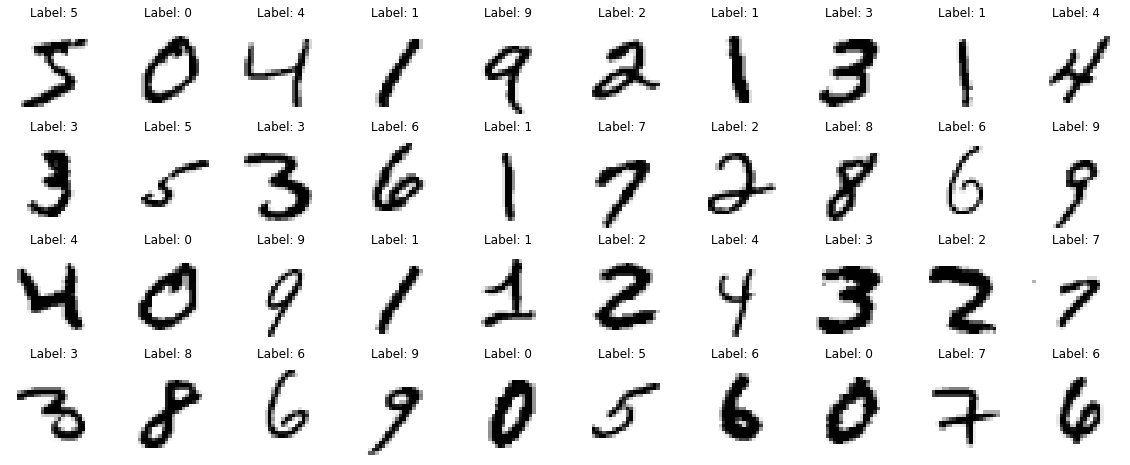

In [19]:
# A few examples
plt.figure(figsize = (20,8))

for index, (image, label) in enumerate(zip(X[0:40], y[0:40])):
    ax = plt.subplot(4, 10, index+1)
    ax.axis('off')
    
    plt.imshow(np.reshape(X[index], (28,28)), cmap='binary')
   
    plt.title('Label: %i' % int(label), fontsize = 12)

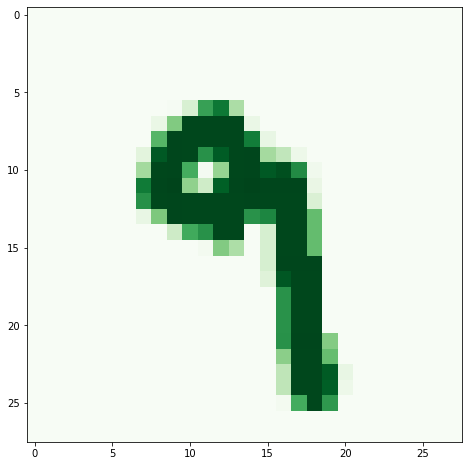

In [25]:
any_digit = X[43000]
any_digit_image = any_digit.reshape(28,28)
plt.figure(figsize=(16,8))
plt.imshow(any_digit_image, cmap = matplotlib.cm.Greens, interpolation='nearest')
# plt.axis('off')
plt.show()

In [39]:
pd.Series(y).value_counts(normalize=True)

1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
dtype: float64

In [40]:
X = X / 255.0

In [105]:
X_train, X_val, X_test, y_train, y_val, y_test = X[:60000], X[60000:69000], X[69000:], y[:60000], y[60000:69000], y[69000:]

In [108]:
index_shuffled = np.random.permutation(60000)
X_train, y_train = X_train[index_shuffled], y_train[index_shuffled]

95% of variance can be reached by 154 components


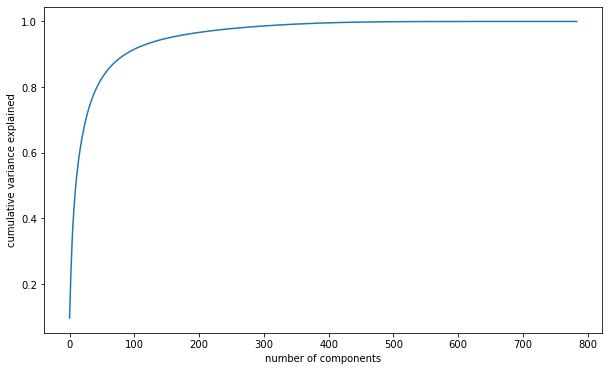

In [109]:
from sklearn.decomposition import PCA

RANDOMSEED = 42
pca = PCA(random_state=RANDOMSEED)
pca.fit(X_train)

acum_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(acum_variance_ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')

print('95% of variance can be reached by {} components'.format(np.argmax(acum_variance_ratio >= 0.95) + 1))

In [110]:
pca_analyzer = PCA(n_components=2, random_state=RANDOMSEED)

x2dim = pca_analyzer.fit_transform(X_train)

pca_df = pd.DataFrame(data=x2dim, columns=['comp1', 'comp2'])
pca_df = pd.concat([pca_df, pd.DataFrame(X_train)], axis=1)

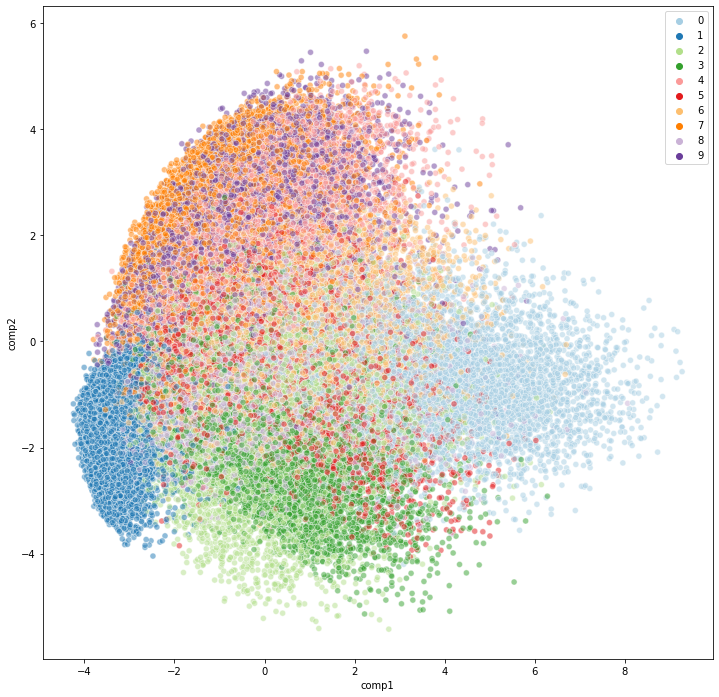

In [111]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=pca_df, x='comp1', y='comp2', hue=y_train, alpha=0.5, palette='Paired')

In [81]:
forest = RandomForestClassifier(n_estimators=800, n_jobs=3, verbose=True, random_state=RANDOMSEED)

In [82]:
forest.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomForestClassifier(n_estimators=300, n_jobs=2, random_state=32,
                       verbose=True)

In [83]:
y_pred = forest.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.8s finished


In [84]:
accuracy_score(y_test, y_pred)

0.971

In [110]:
metrics = [precision_score, recall_score, f1_score]
for i in metrics:
    print(i, ':', i(y_test, y_pred, average='weighted'))

<function precision_score at 0x000001C9E3C72F70> : 0.9710002896149399
<function recall_score at 0x000001C9E3C780D0> : 0.971
<function f1_score at 0x000001C9E3C72A60> : 0.9709816136874188


In [90]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 970,    0,    0,    0,    0,    1,    3,    1,    4,    1],
       [   0, 1123,    3,    3,    0,    2,    2,    0,    1,    1],
       [   6,    0, 1002,    4,    2,    0,    4,    8,    6,    0],
       [   1,    0,    9,  973,    0,    8,    0,    9,    8,    2],
       [   1,    0,    2,    0,  959,    0,    4,    0,    2,   14],
       [   3,    1,    0,   13,    3,  859,    6,    1,    4,    2],
       [   6,    3,    0,    0,    3,    4,  940,    0,    2,    0],
       [   1,    2,   17,    2,    1,    0,    0,  993,    2,   10],
       [   5,    0,    4,    9,    4,    6,    3,    4,  929,   10],
       [   5,    5,    2,   12,   10,    2,    1,    4,    6,  962]],
      dtype=int64)

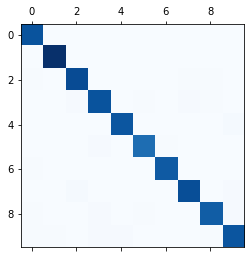

In [127]:
plt.matshow(cm, cmap=plt.cm.Blues)
plt.show()

In [87]:
y_probas = forest.predict_proba(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.8s finished


In [88]:
y_probas

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00666667, 0.01      , 0.81      , ..., 0.        , 0.01666667,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00333333, 0.        , 0.00333333, ..., 0.01      , 0.03666667,
        0.04666667],
       [0.00666667, 0.01      , 0.01333333, ..., 0.00666667, 0.15      ,
        0.03      ],
       [0.        , 0.        , 0.01      , ..., 0.        , 0.01      ,
        0.        ]])

In [89]:
roc_auc_score(y_test, y_probas, multi_class='ovr')

0.9992550437402409

In [126]:
import tensorflow as tf
from keras import backend as K

from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, ReLU, ELU
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [113]:
NUMCLASSES = 10

y_train_oh = to_categorical(y_train, NUMCLASSES)
y_val_oh = to_categorical(y_val, NUMCLASSES)
y_test_oh = to_categorical(y_test, NUMCLASSES)

In [140]:
input_layer = Input((784))

#layer 1
layer1 = Dense(200)(input_layer)
layer1 = BatchNormalization()(layer1)
layer1 = ReLU()(layer1)
layer1 = Dropout(0.2)(layer1)

#Layer 2
layer2 = Dense(200)(layer1)
layer2 = BatchNormalization()(layer2)
layer2 = ReLU()(layer2)
layer2 = Dropout(0.2)(layer2)

output_layer = Dense(NUMCLASSES, activation='softmax')(layer2)

In [141]:
model = Model(input_layer, output_layer, name='DNN')

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [142]:
model.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
batch_normalization_4 (Batch (None, 200)               800       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800     

In [143]:
early_stop = EarlyStopping(patience=10, min_delta=0.01, restore_best_weights=True)

dnn_train_history = model.fit(X_train, y_train_oh, validation_data=(X_val,y_val_oh), batch_size=32, epochs=50,
                              shuffle=True, callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2820 - accuracy: 0.9153 - val_loss: 0.1111 - val_accuracy: 0.9656
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1553 - accuracy: 0.9511 - val_loss: 0.0838 - val_accuracy: 0.9738
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1233 - accuracy: 0.9613 - val_loss: 0.0772 - val_accuracy: 0.9752
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1064 - accuracy: 0.9672 - val_loss: 0.0748 - val_accuracy: 0.9751
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0933 - accuracy: 0.9702 - val_loss: 0.0623 - val_accuracy: 0.9799
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0832 - accuracy: 0.9731 - val_loss: 0.0650 - val_accuracy: 0.9791
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0765 - accuracy: 0.9750 - val_loss: 0.0561 - val_accuracy:

<Figure size 1440x576 with 0 Axes>

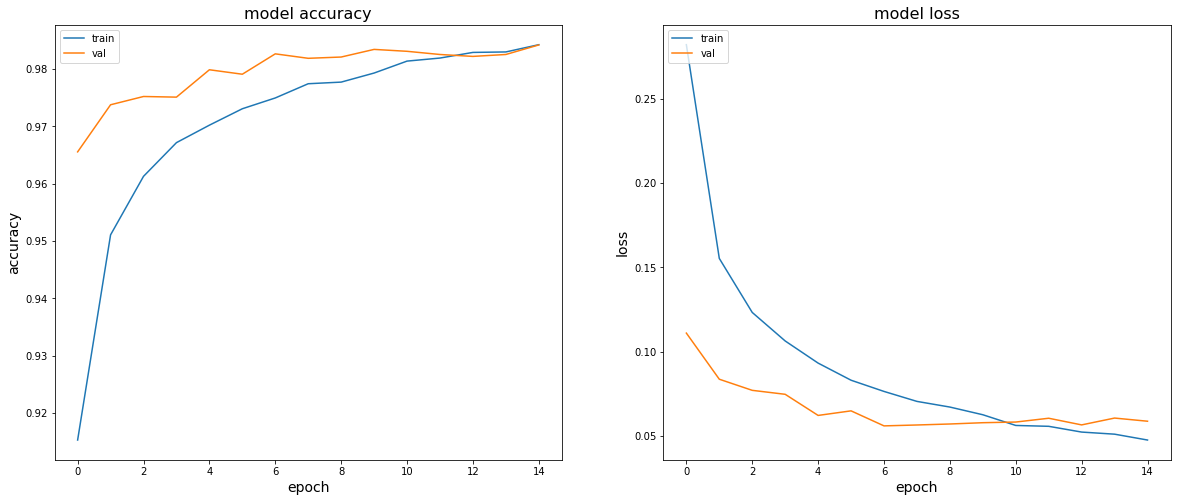

In [163]:
plt.figure(figsize = (20,8))
dic = {0:{'plot1':'accuracy', 'plot2':'val_accuracy', 'title':'model accuracy', 'ylabel': 'accuracy', 'xlabel':'epoch',
       'legend': ['train', 'val']},
       1:{'plot1':'loss', 'plot2':'val_loss', 'title':'model loss', 'ylabel': 'loss', 'xlabel':'epoch',
       'legend': ['train', 'val']}}

plt.figure(figsize = (20,8))

for i in range(len(dic)):
    plt.subplot(1, 2, i+1)
    plt.plot(dnn_train_history.history[dic[i]['plot1']])
    plt.plot(dnn_train_history.history[dic[i]['plot2']])
    plt.title(dic[i]['title'], fontsize=16)
    plt.ylabel(dic[i]['ylabel'], fontsize=14)
    plt.xlabel(dic[i]['xlabel'], fontsize=14)
    plt.legend(dic[i]['legend'], loc='upper left')